# Lesson 06 Notes: Joukowski Transformation

In [47]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

# 1. Complex Numbers in Python

In [18]:
a = 3
b = 3
z = a + b + 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (6+1j)
The type of the variable is  <class 'complex'>


### Exercises for HW 2

In [19]:
a = 2.75 + 3.69j
b = 8.55 - 6.13j
answer1 = a * b

answer2 = 1.4 * numpy.exp(5.32j)

c = 7.51 - 9.15j
d = 4.43 + 9.64j

answer3 = c / d

print('Answer 1: ', answer1)
print('Answer 2: ', answer2)
print('Answer 3: ', answer3)

Answer 1:  (46.1322+14.692000000000004j)
Answer 2:  (0.799270785858-1.1494199454j)
Answer 3:  (-0.4880897698448308-1.0033441577191493j)


# 2. Shapes created by the Joukowski transformation

(-3, 3)

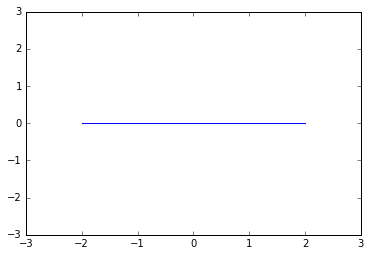

In [20]:
r = 1
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
zeta1 = zcirc + c**2/(zcirc)
zeta = zeta1
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

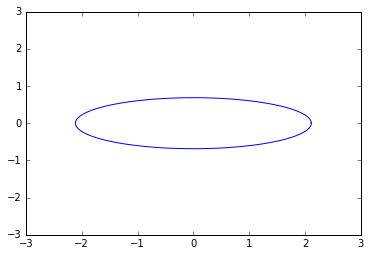

In [21]:
r = 1.4
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
zeta2 = zcirc + c**2/(zcirc)
zeta = zeta2
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

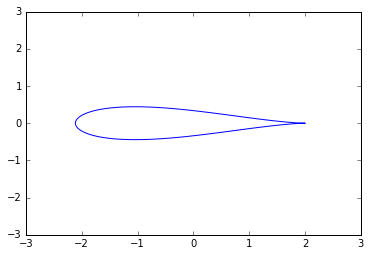

In [22]:
r = 1.2
c = 1
xc, yc = c-r,0
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) + xc)+((r*numpy.sin(theta) + yc)*1j)
zeta3 = zcirc + c**2/(zcirc)
zeta = zeta3
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

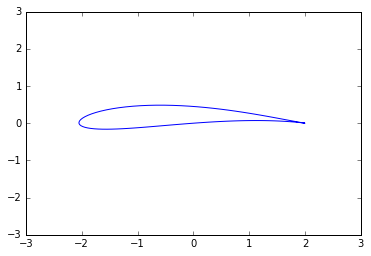

In [23]:
xc, yc = -0.1,0.1
c = 1
r = numpy.sqrt((c+xc)**2+yc**2)
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) - xc)+((r*numpy.sin(theta) + yc)*1j)
zeta4 = zcirc + c**2/(zcirc)
zeta = zeta4
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

# 3. Grid points on the $z$-plane using polar coordinates

50


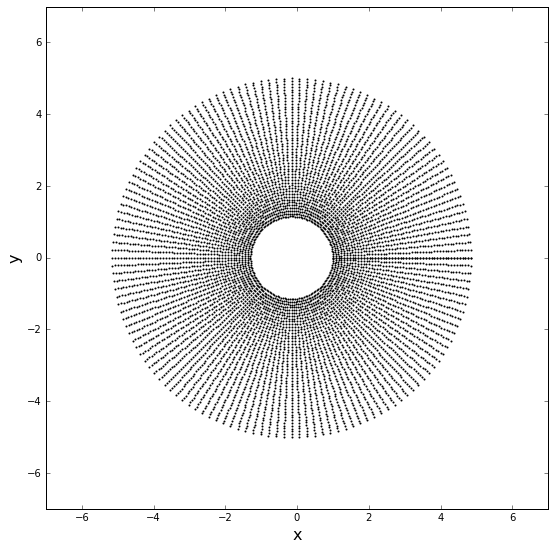

In [112]:
r1 = numpy.linspace(1.15,5,50)
#r2 = -1*r1
#r = numpy.concatenate((r1,r2),axis=0)
r = r1
print(numpy.size(r))
theta = numpy.linspace(0,2*numpy.pi,145)
c = 1

R, THETA = numpy.meshgrid(r,theta)
xc = -0.15
yc = 0

zcirc = (R*numpy.cos(THETA) + xc)+((R*numpy.sin(THETA) + yc)*1j)

size = 9
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(zcirc.real,zcirc.imag,s=1)

(-6, 6)

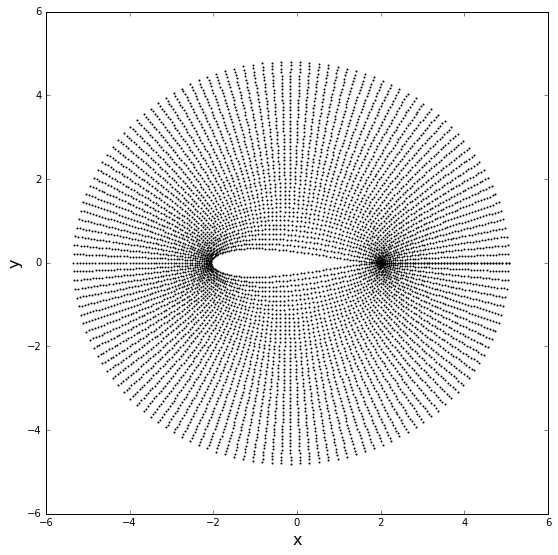

In [113]:
zeta5 = zcirc + c**2/(zcirc)
zeta = zeta5
size = 9
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(zeta.real,zeta.imag,s=1)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)

# 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [114]:
radius = 1.15
uinf = 1
vinf = 0
xd = -0.15
yd = 0

k = (radius**2)*(2*numpy.pi*uinf)
zeta = zeta5

# compute vel field
ud, vd = getveldub(k,xd,yd,zcirc.real,zcirc.imag)

print(numpy.shape(zcirc.real))
print(numpy.shape(zcirc.imag))
print(numpy.shape(ud))
print(numpy.shape(vd))

(145, 50)
(145, 50)
(145, 50)
(145, 50)


ValueError: The rows of 'x' must be equal

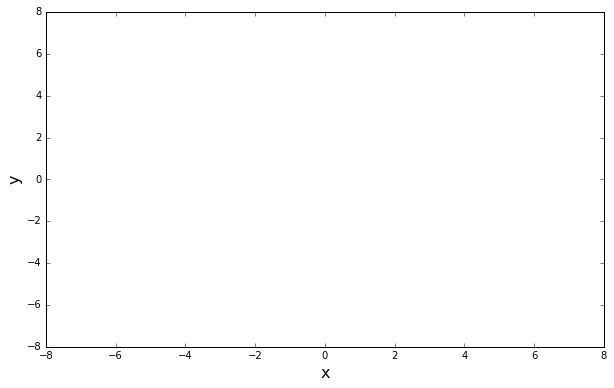

In [118]:
# plot dat streamline gurl
size = 10
pyplot.figure(figsize=(size, 0.6*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-8,8)
pyplot.ylim(-8,8)
pyplot.streamplot(zcirc.real,zcirc.imag,ud,vd,density=2,linewidth=1,arrowsize=1,arrowstyle='->')